<a href="https://colab.research.google.com/github/mash1negun/ppa-for-da/blob/AddingFile/students/%D0%9C%D0%B0%D0%BC%D0%B0%D1%88%D0%B5%D0%B2_%D0%97%D0%B0%D0%B2%D1%83%D1%80/AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Автоматическое машинное обучение

**AutoML** — это метод, который автоматизирует процесс применения методов машинного обучения к данным. Как правило, специалист по обработке данных тратит большую часть своего времени на предварительную обработку, инженерию признаков, выбор и настройку моделей, а затем оценку результатов. AutoML может автоматизировать эти задачи, предоставляя базовый результат, а также может обеспечить высокую производительность при определенных проблемах и дать понимание того, где можно продолжить исследование.

Автоматическое машинное обучение может иметь целью различные стадии процесса:

1) Автоматическая подготовка данных, сбор и сохранение данных (из сырых данных и разнообразных форматов):

*   автоматическое определение типа столбца, например, булевские данные, дискретные численные данные, непрерывные числовые значения или текст;
*   автоматическое определение смысла столбца; например, цель, метка, поле районирования, числовой признак, текстовая категория или свободный текст;
*   автоматическое обнаружение задач, например, двоичная классификация, регрессия, выделение кластеров или ранжирование;

2) Автоматическое конструирование признаков:

*   выбор признаков;
*   выделение признаков;
*   метаобучение и перенос обучения;
*   обнаружение и обработка асимметричных данных или отсутствующих значений;

3) Обнаружение и обработка асимметричных данных или отсутствующих значений;

4) Оптимизация гиперпараметров алгоритма обучения и характеризации;

5) Автоматический выбор метрик оценки и процедур валидации;

6) Автоматическая проверка задач

7) Автоматический анализ полученных результатов;

# Фреймворк - H2O

H2O — это программное обеспечение на основе Java для моделирования данных и общих вычислений. Согласно H2O.ai, «Основное назначение H2O — это распределенный, параллельный механизм обработки памяти (до нескольких сотен гигабайт у параметра Xmx для JVM)».

AutoML — это функция в H2O, которая автоматизирует процесс построения большого количества моделей с целью поиска «лучшей» модели без каких-либо предварительных знаний.

Текущая версия функции AutoML может обучать и выполнять кросс-валидацию для случайного леса, экстремально случайного леса, случайной сетки машин градиентного бустинга, случайной сетки глубоких нейронных сетей, а затем обучать составной ансамбль, используя все модели.

# Регрессионный анализ








Выбранный набор данных представляет собой базу работников некой компании с характеристиками показаными ниже. 

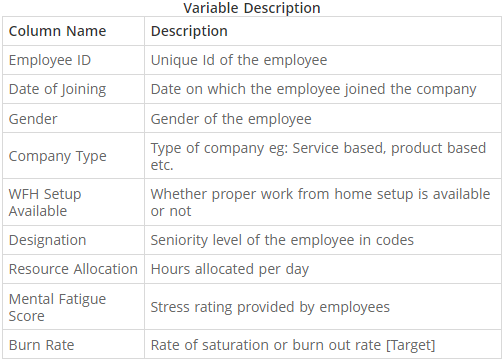

На основе предоставленных данных, необходимо спрогнозировать уровень выгорания сотрудников.

In [ ]:
# Установка Java Runtime Environment
! apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [ ]:
# Установка H2O
! pip install h2o


In [ ]:
# Импорт библиотек
import h2o
import pandas as pd
from h2o.automl import H2OAutoML
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpr4sit_fd
  JVM stdout: /tmp/tmpr4sit_fd/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpr4sit_fd/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,1 month and 14 days
H2O_cluster_name:,H2O_from_python_unknownUser_h9lloe
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Подготовка данных

In [ ]:
#Загрузка тренировочных и тестовых данных
train = h2o.import_file("./gdrive/My Drive/train.csv")
test = h2o.import_file("./gdrive/My Drive/test.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


H2OFrame представляет собой двумерный массив данных, в котором каждый столбец типизирован единообразно. H2OFrame похож на фрейм Pandas.
Одним из важных отличий от других является то, что данные обычно не хранятся в памяти, вместо этого они возможно расположены в удаленном кластере H2O, и H2OFrame представляет собой простой дескриптор этих данных.

In [ ]:
# Конвертация H2O фрейма в фрейм Pandas
train_as_df = h2o.as_list(train,use_pandas=True)
#Удаление строк с пропущенными значениями
train_as_df = train_as_df[train_as_df['Burn Rate'].notna()]
train_as_df = train_as_df[train_as_df['Mental Fatigue Score'].notna()]
train_as_df = train_as_df[train_as_df['Resource Allocation'].notna()]

In [ ]:
# Вывод данных для проверки
train_as_df.head(2)


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,1222732800000,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,1228003200000,Male,Service,Yes,1,2.0,5.0,0.36


Проверка на недостающие значения.

In [ ]:
round((train_as_df.isnull().sum() * 100/ len(train_as_df)),2).sort_values(ascending=False)


Burn Rate               0.0
Mental Fatigue Score    0.0
Resource Allocation     0.0
Designation             0.0
WFH Setup Available     0.0
Company Type            0.0
Gender                  0.0
Date of Joining         0.0
Employee ID             0.0
dtype: float64

In [ ]:
# Конвертация обратно из фрейма данных Pandas в H2O
train = h2o.H2OFrame(train_as_df)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Построение модели

Определим предикторы и отклик. Поскольку мы прогнозируем «уровень выгорания» среди сотрудников, это будет responsible variable. 

In [ ]:
x = train.columns
y = "Burn Rate"
x.remove(y)

Запускаем AutoML для 10 базовых моделей. Аргумент «max_models» указывает количество базовых моделей и не включает никаких ансамблевых моделей, которые можно обучать отдельно.

In [ ]:
aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_6_AutoML_1_20211121_220438

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.002441347168038883
RMSE: 0.04940999056910336
MAE: 0.04007138184566757
RMSLE: 0.03394826585687536
R^2: 0.9378340889947245
Mean Residual Deviance: 0.002441347168038883
Null degrees of freedom: 10049
Residual degrees of freedom: 10045
Null deviance: 394.680645465975
Residual deviance: 24.535539038790773
AIC: -31920.148486179503

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.00283004383584885
RMSE: 0.05319815632001593
MAE: 0.043045464159573256
RMSLE: 0.036407373792341734
R^2: 0.9276972068484636
Mean Residual Deviance: 0.00283004383584885
Null degrees of freedom: 18589
Residual degrees of freedom: 18585
Null dev

Таблица лидеров AutoML. Поскольку мы не указали leaderboard_frame в методе H2OAutoML.train() для оценки и ранжирования моделей, таблица лидеров AutoML использует метрики перекрестной проверки (cross-validation metrics).

Метрика производительности по умолчанию для каждой задачи машинного обучения (двоичная классификация, мультиклассовая классификация, регрессия) указывается внутри, и таблица лидеров будет отсортирована именно по этой метрике. В случае бинарной классификации метрикой ранжирования по умолчанию является площадь под кривой ROC (AUC). Для создания рейтинга в таблице лидеров можно указать любую метрику H2O. Модель лидера хранится в aml.leader, а таблица лидеров - в aml.leaderboard.

In [ ]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_6_AutoML_1_20211121_220438,0.00283004,0.0531982,0.00283004,0.0430455,0.0364074
StackedEnsemble_AllModels_5_AutoML_1_20211121_220438,0.00283097,0.0532069,0.00283097,0.0430627,0.0364158
StackedEnsemble_BestOfFamily_3_AutoML_1_20211121_220438,0.00283662,0.0532599,0.00283662,0.0431382,0.0364536
StackedEnsemble_AllModels_2_AutoML_1_20211121_220438,0.00283948,0.0532867,0.00283948,0.043159,0.0364741
StackedEnsemble_AllModels_1_AutoML_1_20211121_220438,0.0028406,0.0532973,0.0028406,0.0431653,0.0364829
StackedEnsemble_BestOfFamily_2_AutoML_1_20211121_220438,0.00284174,0.0533079,0.00284174,0.0431873,0.0364958
StackedEnsemble_BestOfFamily_5_AutoML_1_20211121_220438,0.00284982,0.0533837,0.00284982,0.0432559,0.0365575
StackedEnsemble_AllModels_4_AutoML_1_20211121_220438,0.00285042,0.0533893,0.00285042,0.0432548,0.036573
StackedEnsemble_BestOfFamily_1_AutoML_1_20211121_220438,0.00285251,0.0534089,0.00285251,0.0433906,0.0365543
GBM_2_AutoML_1_20211121_220438,0.00285483,0.0534306,0.00285483,0.043225,0.0365782


In [ ]:
# Генерация прогноза для набора тестов через лидера 
preds = aml.leader.predict(test)


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
# Совмещение прогноза с тестовым набором данных
df = test.cbind(preds)
df.head(10)

Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,predict
fffe31003300390039003000,2008-12-10 00:00:00,Female,Service,No,2,5,7.7,0.607414
fffe31003300310037003800,2008-08-14 00:00:00,Female,Product,Yes,1,2,5.2,0.348131
fffe33003400380035003900,2008-11-13 00:00:00,Male,Product,Yes,1,3,5.9,0.426041
fffe3100370039003200,2008-02-07 00:00:00,Female,Service,No,3,6,4.6,0.3939
fffe32003600390036003700,2008-07-17 00:00:00,Female,Product,No,2,5,6.4,0.531405
fffe3600390032003200,2008-09-19 00:00:00,Male,Product,No,3,5,6.5,0.521066
fffe3600370032003200,2008-01-16 00:00:00,Female,Service,Yes,2,3,4.7,0.319343
fffe32003900390030003000,2008-02-10 00:00:00,Male,Service,No,2,5,8.5,0.681812
fffe3100370031003000,2008-08-10 00:00:00,Male,Product,Yes,2,5,7.6,0.603586
fffe31003500320037003600,2008-05-20 00:00:00,Male,Product,Yes,2,5,5.7,0.440847


In [ ]:
# Разделение столбцов на "идентификатор сотрудника" и "прогноз"
res = df[:, ["Employee ID", "predict"]]
res.head(2)

Employee ID,predict
fffe31003300390039003000,0.607414
fffe31003300310037003800,0.348131


In [ ]:
# Вывод работников с уровнем выгорания
res.set_names(['Employee ID','Burn Rate'])


Employee ID,Burn Rate
fffe31003300390039003000,0.607414
fffe31003300310037003800,0.348131
fffe33003400380035003900,0.426041
fffe3100370039003200,0.3939
fffe32003600390036003700,0.531405
fffe3600390032003200,0.521066
fffe3600370032003200,0.319343
fffe32003900390030003000,0.681812
fffe3100370031003000,0.603586
fffe31003500320037003600,0.440847


# Источники

https://towardsdatascience.com/automated-machine-learning-with-h2o-258a2f3a203f

https://neurohive.io/ru/tutorial/tutorial-po-primeneniju-automl-v-h2o-ai-dlya-avtomatizacii-podbora-giperparametrov-modeli/

https://www.machinelearningmastery.ru/a-deep-dive-into-h2os-automl-4b1fe51d3f3e/

https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%82%D0%BE%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5